# Importing Libreries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Data Collection

In [2]:
df1 = pd.read_excel('datasets/3_ev_market_india_dataset.xlsx')
df1.head()
     

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [3]:
df2=pd.read_excel('datasets/2_ev_charging_station_dataset.xlsx')
df2=df2.drop(0)
df2.head()


,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
1,Andaman & Nicobar Island,162,146945,147107
2,Arunachal Pradesh,20,252965,252985
3,Assam,64766,4677053,4741819
4,Bihar,83335,10407078,10490413
5,Chandigarh,2812,746881,749693


In [4]:
df3=pd.read_excel('datasets/Charging_station.xlsx')
df3=df3.drop(0)
df3



,State,No. of EV chargers sanctioned
1,Maharashtra,317
2,Andhra Pradesh,266
3,Tamil Nadu,281
4,Gujarat,278
5,Uttar Pradesh,207
6,Rajasthan,205
7,Karnataka,172
8,Madhya Pradesh,235
9,West Bengal,141
10,Telangana,138


In [5]:
df4=pd.read_csv("datasets/1_ev_dataset.csv")
df4.head()

,Region,2W,3W,4W,Bus
0,Uttar Pradesh,9852,42881,458,197
1,Maharastra,38558,893,1895,186
2,Karnataka,32844,568,589,57
3,Tamil Nadu,25642,396,426,0
4,Gujarat,22359,254,423,22


In [6]:
print('DF1 Shape: ', df1.shape)
print('DF2 Shape: ', df2.shape)
print('DF3 Shape: ', df3.shape)
print('DF4 Shape: ', df3.shape)




DF1 Shape:  (103, 14)
DF2 Shape:  (32, 4)
DF3 Shape:  (25, 2)
DF4 Shape:  (25, 2)


In [7]:
print(df1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB
None


In [8]:
print(df2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 1 to 32
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   State Name                  32 non-null     object
 1   Total Electric Vehicle      32 non-null     object
 2   Total Non-Electric Vehicle  32 non-null     object
 3   Total                       32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB
None


In [9]:
print(df3.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   State                          25 non-null     object
 1   No. of EV chargers sanctioned  25 non-null     object
dtypes: object(2)
memory usage: 532.0+ bytes
None


In [10]:
print(df4.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Region  24 non-null     object
 1   2W      24 non-null     int64 
 2   3W      24 non-null     int64 
 3   4W      24 non-null     int64 
 4   Bus     24 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ KB
None


In [11]:
d1 = df1.describe()
d2 = df2.describe()
d3 = df3.describe()
d4 = df4.describe()

display('<<< DATASET 1 >>>', d1, '<<< DATASET 2 >>>', d2, '<<< DATASET 3 >>>', d3,'<<< DATASET 4 >>>', d4)

'<<< DATASET 1 >>>'

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,444.271845,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,203.949253,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


'<<< DATASET 2 >>>'

,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
count,32,32,32,32
unique,32,31,32,32
top,Andaman & Nicobar Island,21,146945,147107
freq,1,2,1,1


'<<< DATASET 3 >>>'

,State,No. of EV chargers sanctioned
count,25,25
unique,25,21
top,Maharashtra,10
freq,1,4


'<<< DATASET 4 >>>'

,2W,3W,4W,Bus
count,24.000000,24.000000,24.000000,24.000000
mean,8421.458333,3853.166667,334.041667,28.500000
std,10942.261145,8850.690961,476.930628,63.771331
min,187.000000,234.000000,12.000000,0.000000
25%,848.000000,512.750000,34.750000,0.000000
50%,2967.500000,931.000000,129.000000,0.000000
75%,10697.750000,2659.250000,434.000000,5.500000
max,38558.000000,42881.000000,1895.000000,197.000000


# Exploratory Data Analysis

In [12]:
print("Total Non-Electric Vehicle",df2['Total Non-Electric Vehicle'].sum())
print("Total Electric Vehicle",df2['Total Electric Vehicle'].sum())


Total Non-Electric Vehicle 278169631
Total Electric Vehicle 1334385


c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


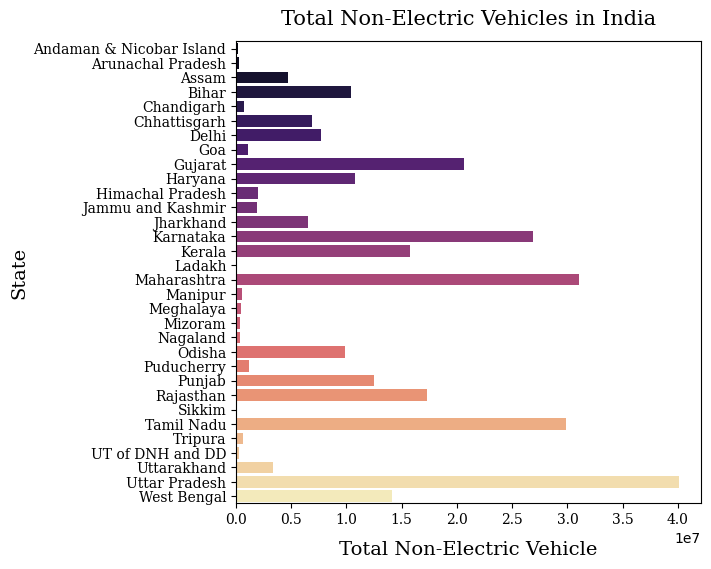

In [13]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df2, y='State Name', x='Total Non-Electric Vehicle', palette='magma')
plt.xlabel('Total Non-Electric Vehicle', fontsize=14, family='serif', labelpad=10)
plt.ylabel('State', fontsize=14, family='serif')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Total Non-Electric Vehicles in India', weight=200, family='serif', size=15, pad=12)

plt.show()

c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


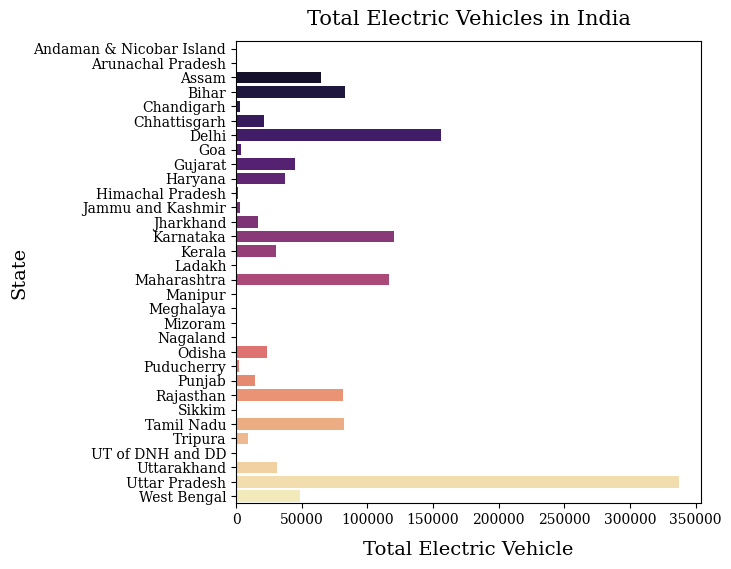

In [14]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df2, y='State Name', x='Total Electric Vehicle', palette='magma')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Total Electric Vehicle', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Total Electric Vehicles in India', weight=200, family='serif', size=15, pad=12)
plt.show()

c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


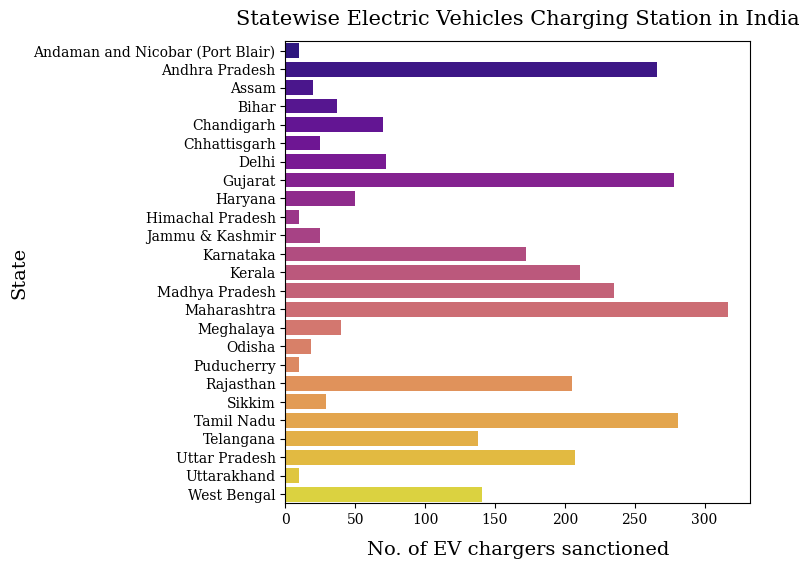

In [15]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df3.sort_values('State', ascending=True), y='State', x='No. of EV chargers sanctioned', palette='plasma')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('No. of EV chargers sanctioned', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles Charging Station in India', weight=200, family='serif', size=15, pad=12)
plt.show()

c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


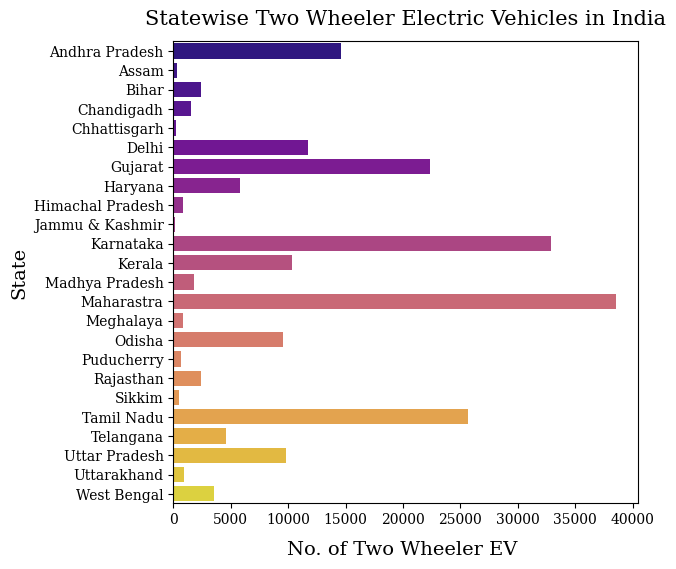

In [16]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df4.sort_values('Region', ascending=True), y='Region', x='2W', palette='plasma')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('No. of Two Wheeler EV ', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Two Wheeler Electric Vehicles in India', weight=200, family='serif', size=15, pad=12)
plt.show()

c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


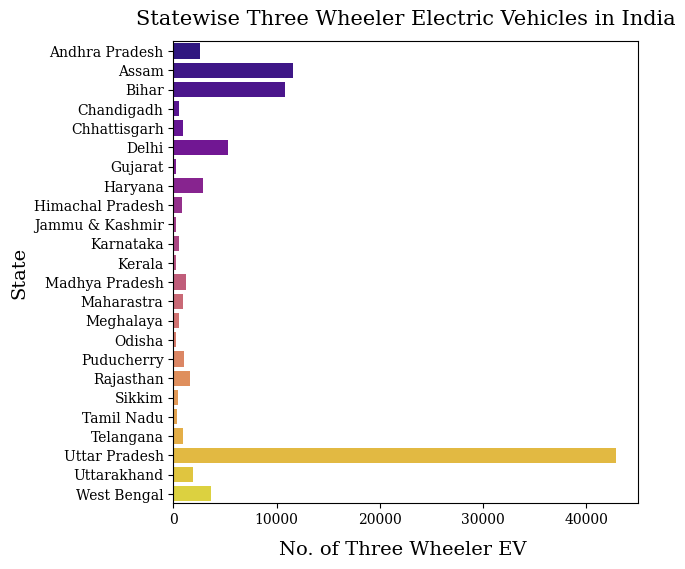

In [17]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df4.sort_values('Region', ascending=True), y='Region', x='3W', palette='plasma')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('No. of Three Wheeler EV ', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Three Wheeler Electric Vehicles in India', weight=200, family='serif', size=15, pad=12)
plt.show()

c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


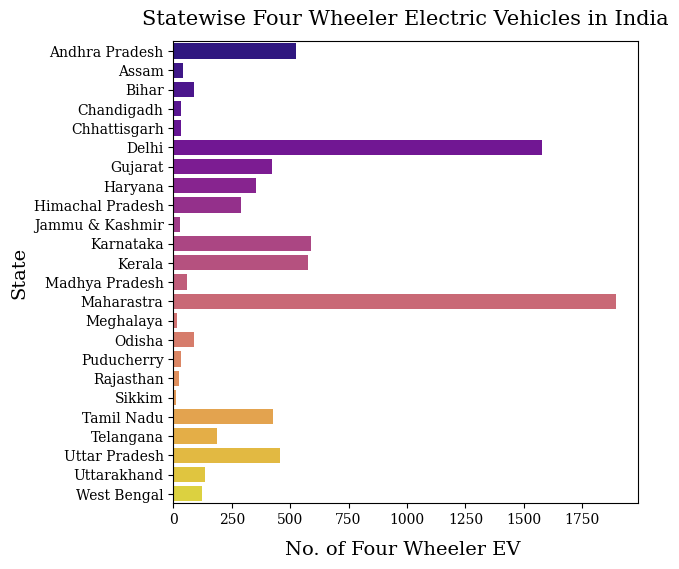

In [18]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df4.sort_values('Region', ascending=True), y='Region', x='4W', palette='plasma')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('No. of Four Wheeler EV ', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Four Wheeler Electric Vehicles in India', weight=200, family='serif', size=15, pad=12)
plt.show()

c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


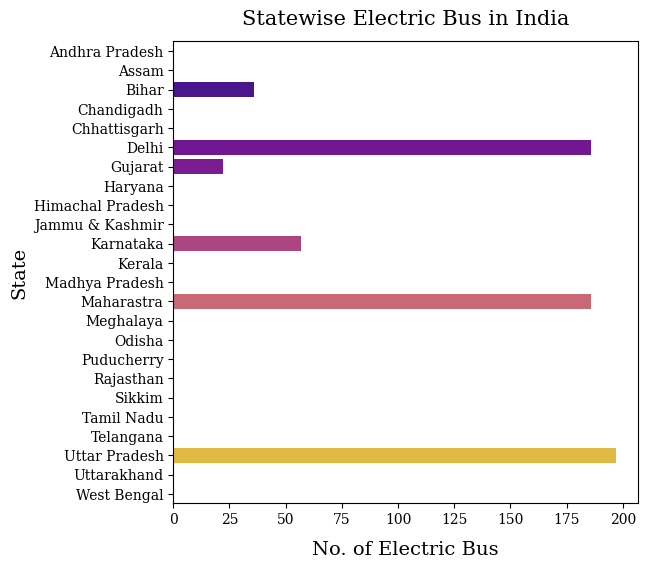

In [19]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df4.sort_values('Region', ascending=True), y='Region', x='Bus', palette='plasma')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('No. of Electric Bus', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Bus in India', weight=200, family='serif', size=15, pad=12)
plt.show()

c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


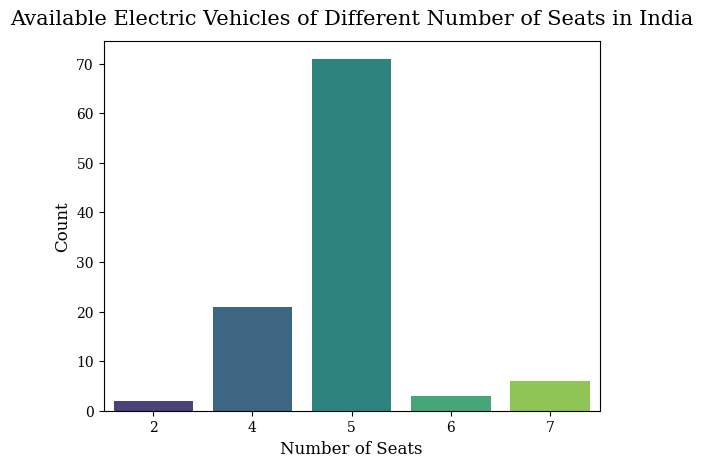

In [20]:
sns.countplot(data=df1, x='Seats', palette='viridis')
plt.xlabel('Number of Seats', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Available Electric Vehicles of Different Number of Seats in India', family='serif', size=15, pad=12)
plt.show()

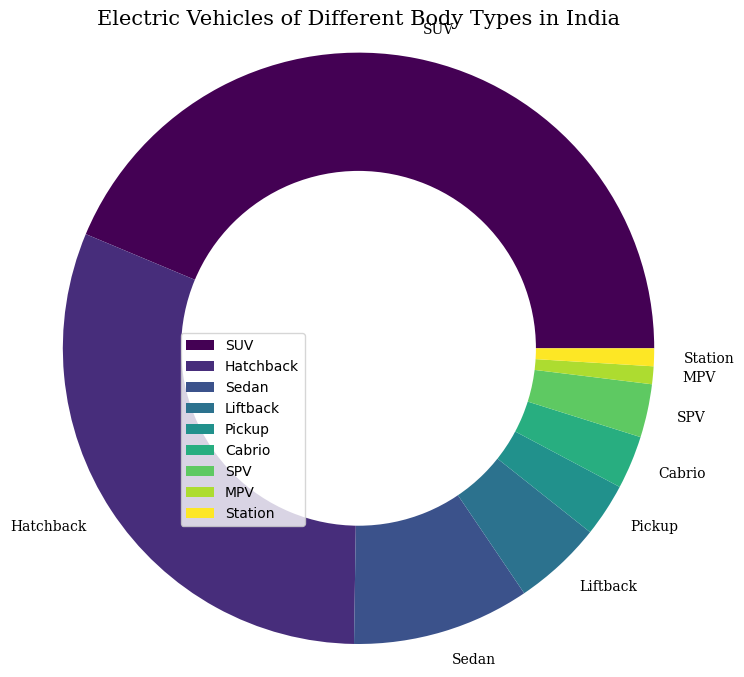

In [21]:
x = df1['BodyStyle'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'))
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Electric Vehicles of Different Body Types in India', family='serif', size=15, pad=100)
plt.legend()
plt.ylabel('')
plt.show()

c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Amit\AppData\Local\Temp\ipykernel_18472\1837419087.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the 

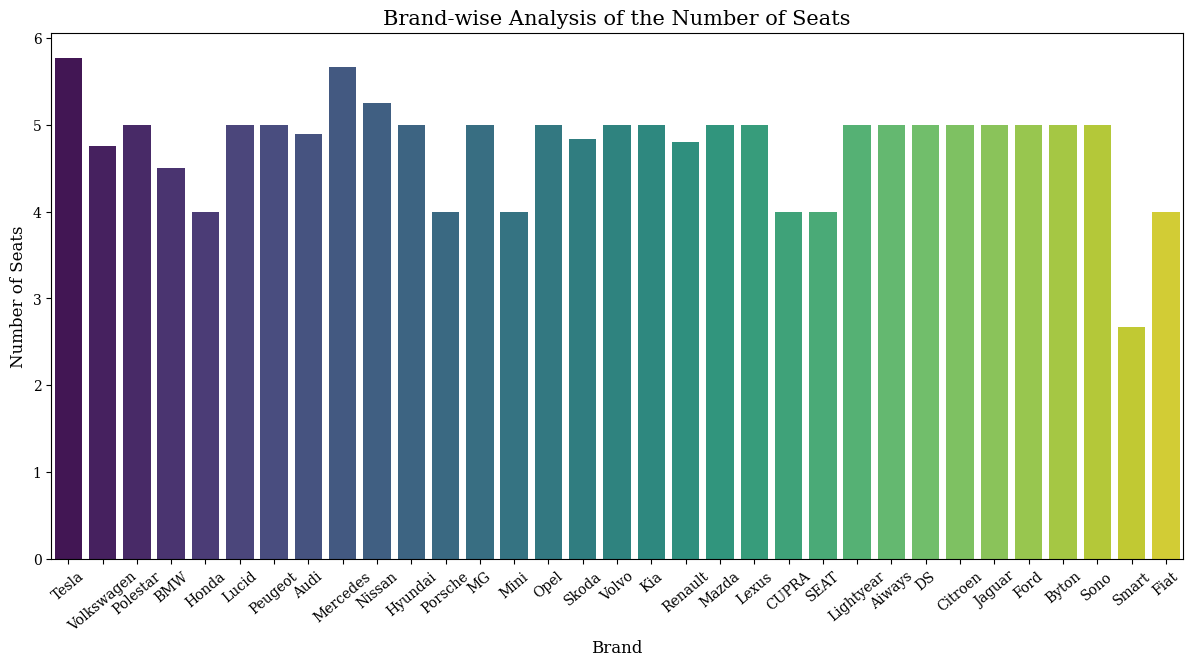

In [22]:
sns.catplot(kind='bar', data=df1, x='Brand', y='Seats', palette='viridis', ci=None, height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Number of Seats', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Analysis of the Number of Seats', family='serif', size=15);

c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla'),
  Text(1, 0, 'Volkswagen'),
  Text(2, 0, 'Polestar'),
  Text(3, 0, 'BMW'),
  Text(4, 0, 'Honda'),
  Text(5, 0, 'Lucid'),
  Text(6, 0, 'Peugeot'),
  Text(7, 0, 'Audi'),
  Text(8, 0, 'Mercedes'),
  Text(9, 0, 'Nissan'),
  Text(10, 0, 'Hyundai'),
  Text(11, 0, 'Porsche'),
  Text(12, 0, 'MG'),
  Text(13, 0, 'Mini'),
  Text(14, 0, 'Opel'),
  Text(15, 0, 'Skoda'),
  Text(16, 0, 'Volvo'),
  Text(17, 0, 'Kia'),
  Text(18, 0, 'Renault'),
  Text(19, 0, 'Mazda'),
  Text(20, 0, 'Lexus'),
  Text(21, 0, 'CUPRA'),
  Text(22, 0, 'SEAT'),
  Text(23, 0, 'Lightyear'),
  Text(24, 0, 'Aiways'),
  Text(25, 0, 'DS'),
  Text(26, 0, 'Citroen'),
  Text(27, 0, 'Jaguar'),
  Text(28, 0, 'Ford'),
  Text(29, 0, 'Byton'),
  Text(30, 0, 'Sono'),
  Text(31, 0, 'Smart'),
  Text(32, 0, 'Fiat')])

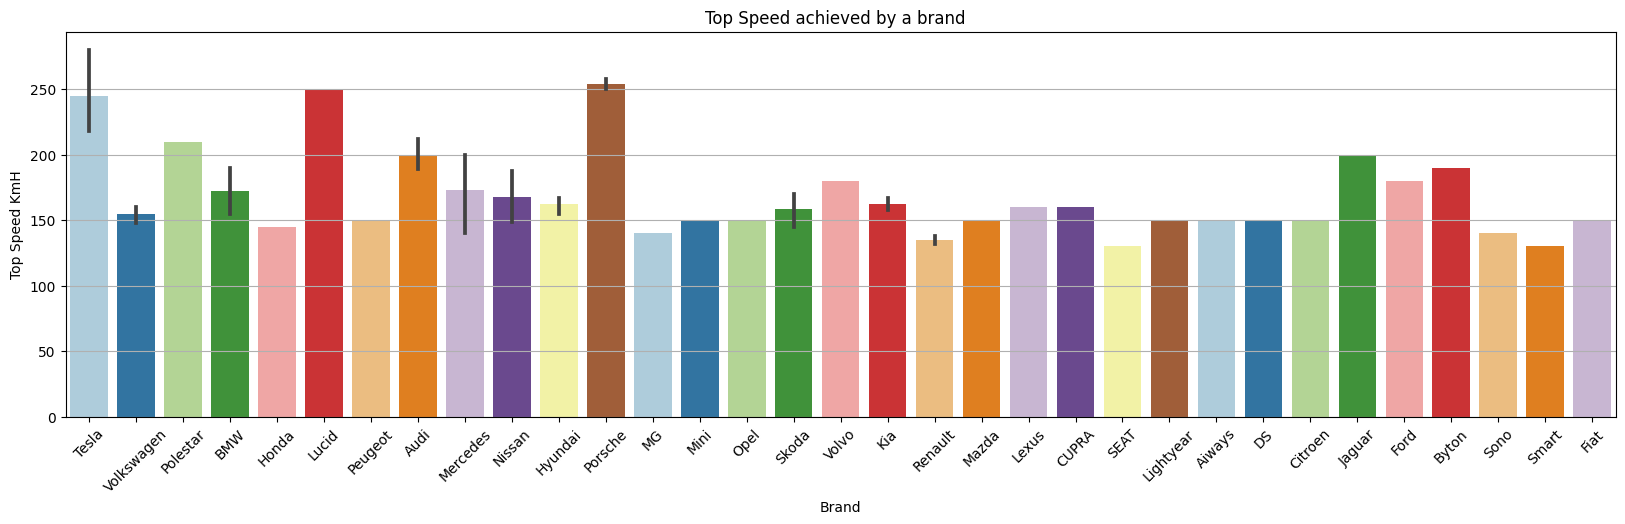

In [23]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='TopSpeed_KmH',data=df1,palette='Paired')
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand  ')
plt.xlabel('Brand')
plt.ylabel('Top Speed KmH')
plt.xticks(rotation=45)


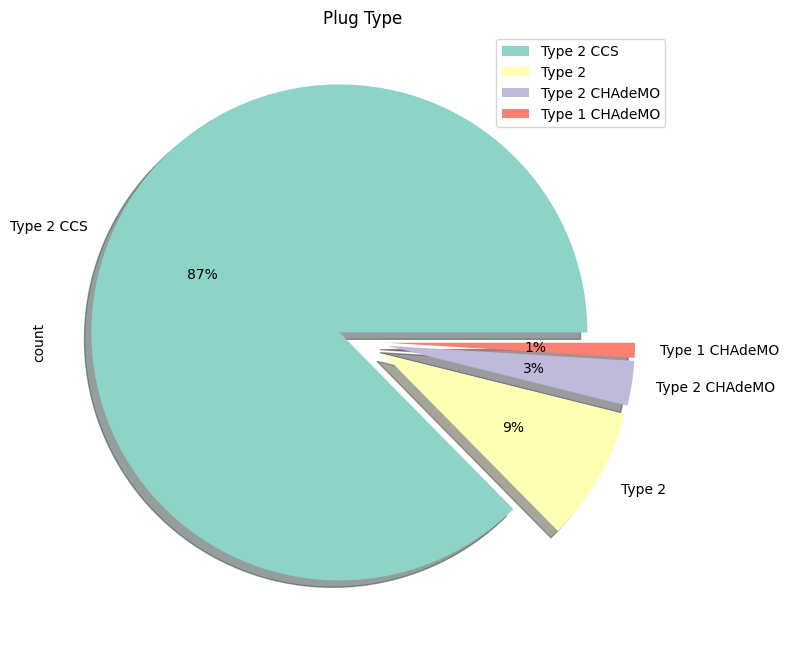

In [24]:
colors = sns.color_palette('Set3', n_colors=len(df1['PlugType'].unique()))
df1['PlugType'].value_counts().plot.pie(figsize=(8, 15), shadow=True, autopct='%.0f%%', explode=(0.1, 0.1, 0.1, 0.1), colors=colors)
plt.title('Plug Type')
plt.legend()
plt.show()


c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

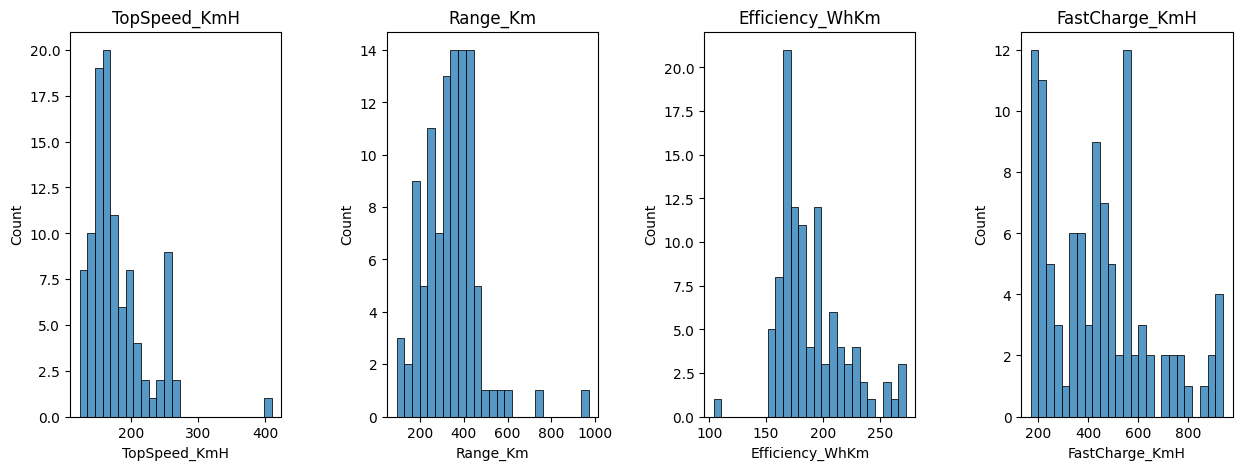

In [25]:
plt.figure(1, figsize=(15,5))
n=0
for x in ['TopSpeed_KmH', 'Range_Km' ,'Efficiency_WhKm'  ,'FastCharge_KmH']:
  n += 1
  plt.subplot(1,4,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.histplot(df1[x], bins= 25)
  plt.title(f'{x}')
plt.show()

In [26]:
df1['PowerTrain'].replace(to_replace=['RWD','FWD','AWD'],value=[0, 1, 2],inplace=True)

# RapidCharge feature
df1['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)
     

In [27]:
X = df1[['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]


In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [29]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.429225,-0.554599,-1.147772,-0.882791,0.839988,-0.959297,0.998880,0.711148,-0.396662
1,-2.322483,-0.345449,0.896473,-1.305529,0.079598,0.235116,-0.213678,-0.544135,-0.181867
2,1.587851,0.008899,-0.650523,0.041024,0.593537,-0.698248,0.058718,0.248837,-0.202775
3,0.291018,-0.000150,-0.307702,-0.514196,-1.608861,0.291624,0.364999,-0.235543,0.261663
4,-2.602679,-0.626489,-0.888088,0.585294,-0.802108,0.027387,-0.084955,-0.507790,-0.049904


c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

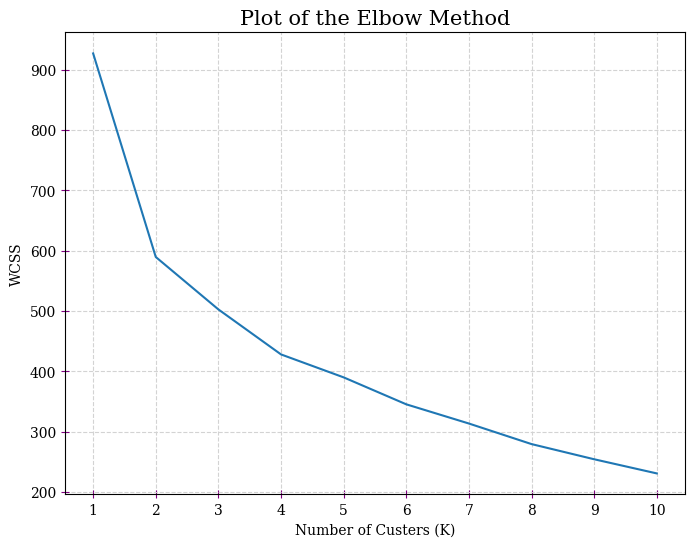

In [30]:
wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [31]:
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=90)

In [32]:
print(kmean.labels_)

[3 0 2 1 1 3 0 0 1 2 2 1 1 2 0 1 3 1 0 1 1 2 1 3 3 1 1 2 0 0 2 1 1 2 1 1 1
 0 0 2 3 1 2 1 1 1 1 3 3 0 2 3 1 1 2 1 1 0 1 3 0 2 2 2 0 3 1 2 0 2 1 2 3 2
 1 1 2 0 2 3 1 2 0 1 2 1 2 2 2 1 2 0 0 2 1 1 1 0 1 2 2 2 2]


In [33]:
pd.Series(kmean.labels_).value_counts()


1    39
2    32
0    19
3    13
Name: count, dtype: int64

In [34]:
df1['clusters'] = kmean.labels_


c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Amit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


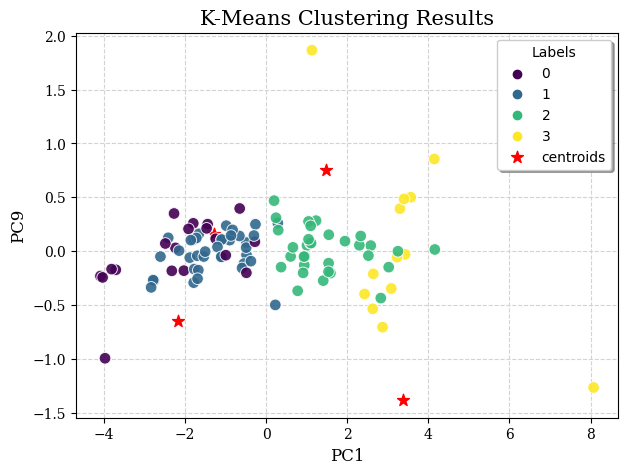

In [35]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC9', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC9', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()